# Data Exploration Analysis For the Sales Prediction Data
### EDA Steps:
1. Data Assessing 
2. Data Cleaning
3. Univariate EDA
4. Bivariate EDA
5. Multivariate EDA
6. Outliers Detection

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# 1. Data Assessment

In [3]:
df = pd.read_csv(r"C:\Users\USER\Desktop\sales pred\Train.csv")
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,2017,Kireka,Supermarket,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,2017,Kireka,Supermarket,443.4228
2,17.50,Low Fat,Meat,141.6180,2017,Kireka,Supermarket,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,2017,Kireka,Supermarket,732.3800
4,8.93,Low Fat,Household,53.8614,2017,Kireka,Supermarket,994.7052


In [4]:
df.shape

(257, 8)

In [5]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                207 non-null    float64
 1   Item_Fat_Content           257 non-null    object 
 2   Item_Type                  257 non-null    object 
 3   Item_MRP                   257 non-null    float64
 4   Outlet_Establishment_Year  257 non-null    int64  
 5   Outlet_Location_Type       257 non-null    object 
 6   Outlet_Type                257 non-null    object 
 7   Item_Outlet_Sales          257 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 16.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,207.000000,257.000000,257.0,257.000000
mean,12.824300,139.765798,2017.0,2170.997635
std,4.415548,63.948644,0.0,1746.535039
min,4.880000,31.290000,2017.0,41.279600
25%,8.892500,92.680400,2017.0,745.696000
50%,12.850000,143.881200,2017.0,1794.331000
75%,16.600000,185.426600,2017.0,3134.586400
max,21.350000,265.222600,2017.0,7968.294400


In [8]:
df.isnull().sum()

Item_Weight                  50
Item_Fat_Content              0
Item_Type                     0
Item_MRP                      0
Outlet_Establishment_Year     0
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# define numerical & categorical columns in train data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print numerical & categorical columns in train data
print('We have {} numerical features in train data and they as as follows : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features train data and they as as follows: {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features in train data and they as as follows : ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 4 categorical features train data and they as as follows: ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
print('Number of unique data points in categorical features in Train data')
print('Number of unique data points in Item_Fat_Content:', df['Item_Fat_Content'].unique())
print('Number of unique data points in Item_Type:',df['Item_Type'].unique())
print('Number of unique data points in Outlet_Location_Type:', df['Outlet_Location_Type'].unique())
print('Number of unique data points in Outlet_Type:', df['Outlet_Type'].unique())

Number of unique data points in categorical features in Train data
Number of unique data points in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Number of unique data points in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Number of unique data points in Outlet_Location_Type: ['Kireka']
Number of unique data points in Outlet_Type: ['Supermarket']


# 2. Data Cleaning

In [ ]:
# Drop rows with missing values (optional, uncomment if needed)
# df = df.dropna()

# Create the new column 'Outlet_Age' using 'Outlet_Establishment_Year'
df['Outlet_Age'] = df['Outlet_Establishment_Year'].apply(lambda year: 2025 - year)
df.head()



,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,Dairy,249.8092,2017,Kireka,Supermarket,3735.1380,8
1,5.92,Regular,Soft Drinks,48.2692,2017,Kireka,Supermarket,443.4228,8
2,17.50,Low Fat,Meat,141.6180,2017,Kireka,Supermarket,2097.2700,8
3,19.20,Regular,Fruits and Vegetables,182.0950,2017,Kireka,Supermarket,732.3800,8
4,8.93,Low Fat,Household,53.8614,2017,Kireka,Supermarket,994.7052,8


In [13]:
# Standardize values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# Drop the 'Outlet_Establishment_Year' column after creating 'Outlet_Age'
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

# 3. Univariate EDA

#### Summary Statistics for Numeric Features:

In [14]:
# Compute basic statistics
numeric_stats = df[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']].describe()

# Display the summary statistics
print(numeric_stats)

       Item_Weight    Item_MRP  Item_Outlet_Sales  Outlet_Age
count   207.000000  257.000000         257.000000       257.0
mean     12.824300  139.765798        2170.997635         8.0
std       4.415548   63.948644        1746.535039         0.0
min       4.880000   31.290000          41.279600         8.0
25%       8.892500   92.680400         745.696000         8.0
50%      12.850000  143.881200        1794.331000         8.0
75%      16.600000  185.426600        3134.586400         8.0
max      21.350000  265.222600        7968.294400         8.0


#### Distribution Plots for Numeric Features:

Text(0.5, 1.0, 'Distribution of Item_Outlet_Sales')

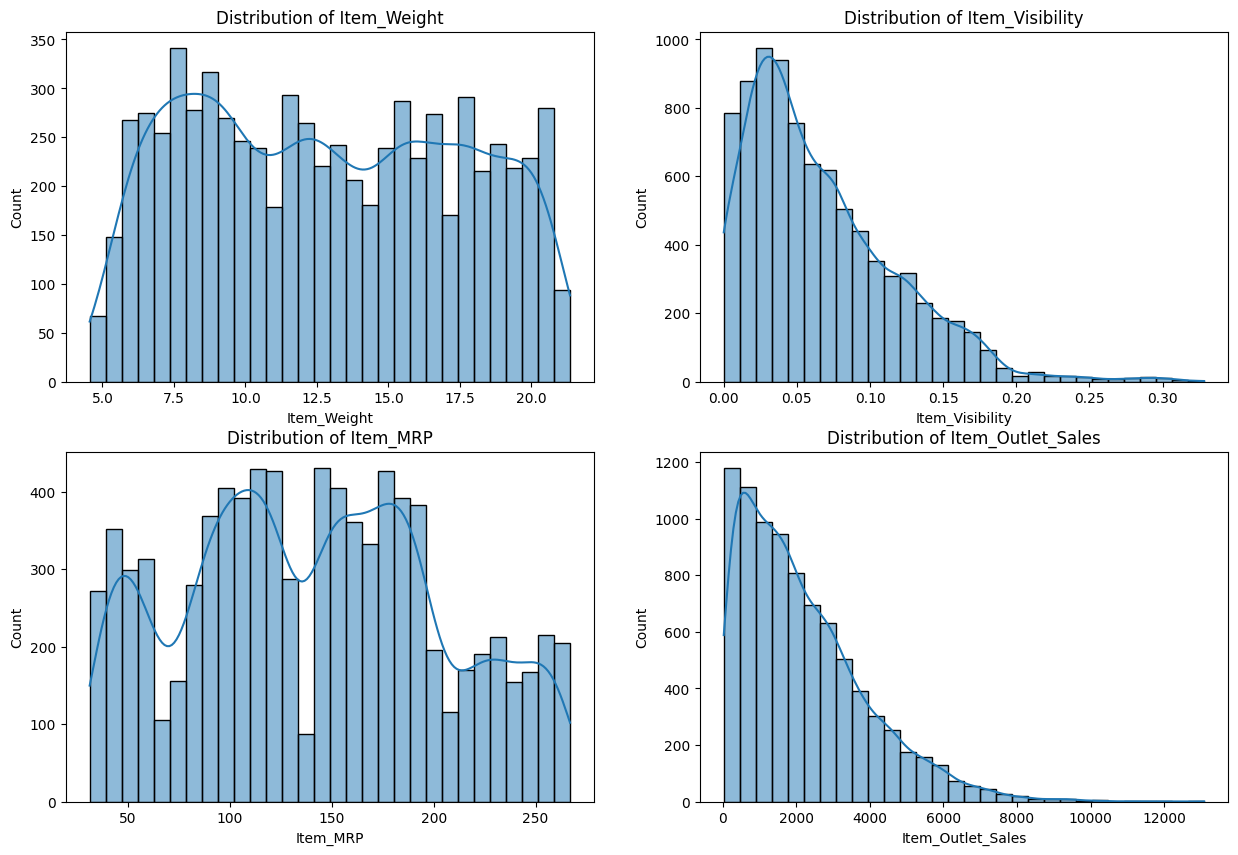

In [ ]:
# Create subplots for distribution plots
plt.figure(figsize=(15, 10))

# Distribution Plot for Item_Weight
plt.subplot(221)
sns.histplot(df['Item_Weight'], kde=True, bins=30)
plt.title('Distribution of Item_Weight')


# Distribution Plot for Item_MRP
plt.subplot(223)
sns.histplot(df['Item_MRP'], kde=True, bins=30)
plt.title('Distribution of Item_MRP')

# Distribution Plot for Item_Outlet_Sales
plt.subplot(224)
sns.histplot(df['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of Item_Outlet_Sales')

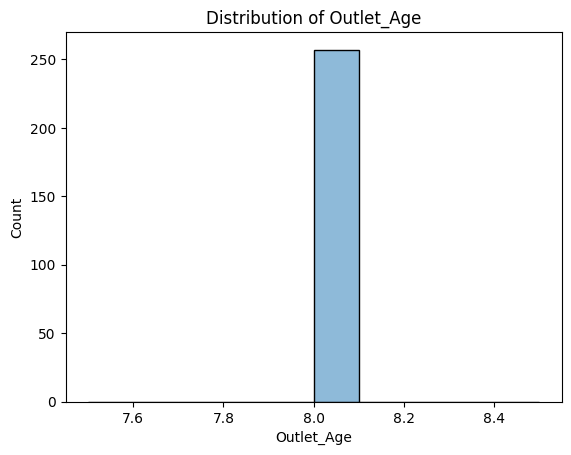

In [15]:
# Distribution Plot for Outlet_Age
sns.histplot(df['Outlet_Age'], kde=True, bins=10)
plt.title('Distribution of Outlet_Age')
plt.show()

#### Count Plots for Categorical Features:

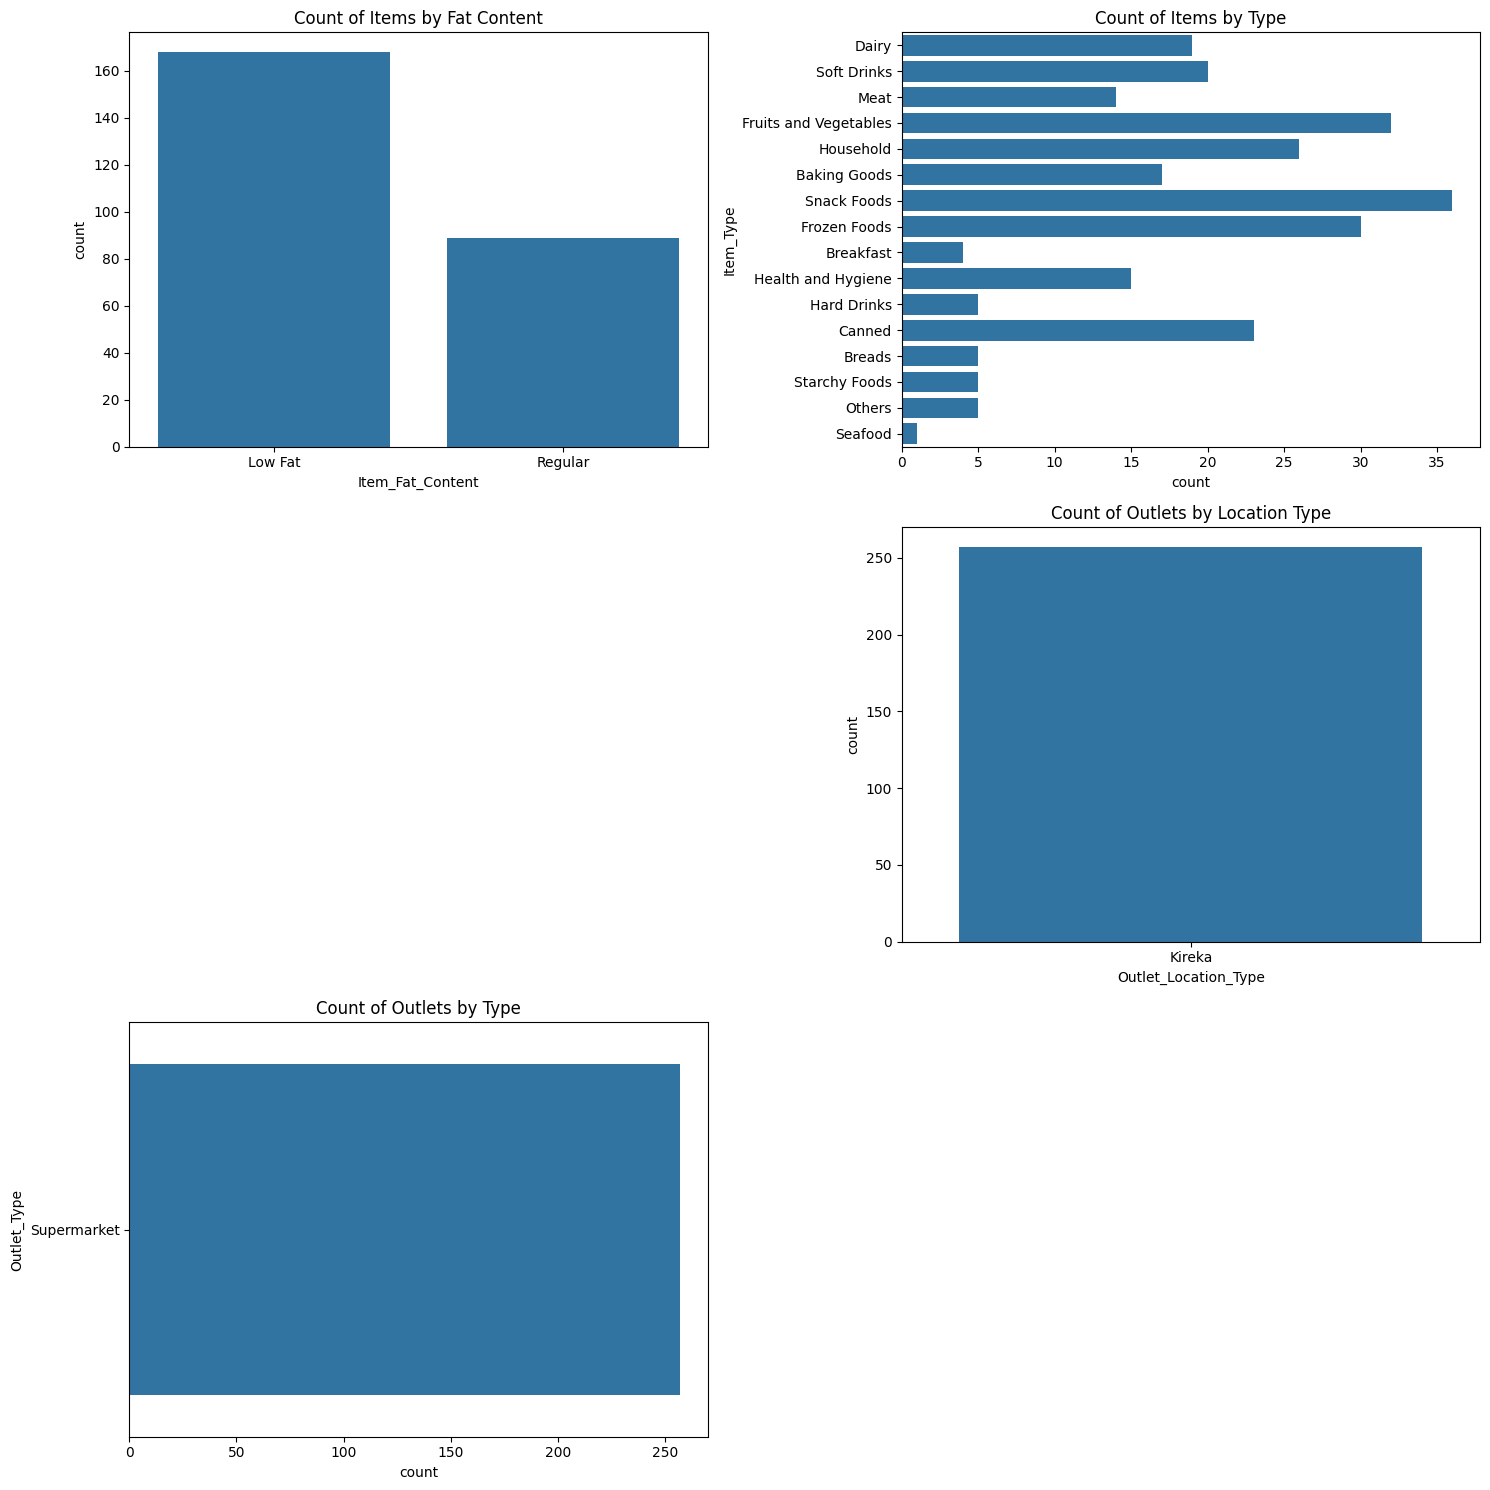

In [17]:
# Create subplots for count plots
plt.figure(figsize=(15, 15))

# Count Plot for Item_Fat_Content
plt.subplot(321)
sns.countplot(data=df, x='Item_Fat_Content')
plt.title('Count of Items by Fat Content')

# Count Plot for Item_Type
plt.subplot(322)
sns.countplot(data=df, y='Item_Type')
plt.title('Count of Items by Type')

# Count Plot for Outlet_Location_Type
plt.subplot(324)
sns.countplot(data=df, x='Outlet_Location_Type')
plt.title('Count of Outlets by Location Type')

# Count Plot for Outlet_Type
plt.subplot(325)
sns.countplot(data=df, y='Outlet_Type')
plt.title('Count of Outlets by Type')

plt.tight_layout()
plt.show()


# 4. Bivariate EDA

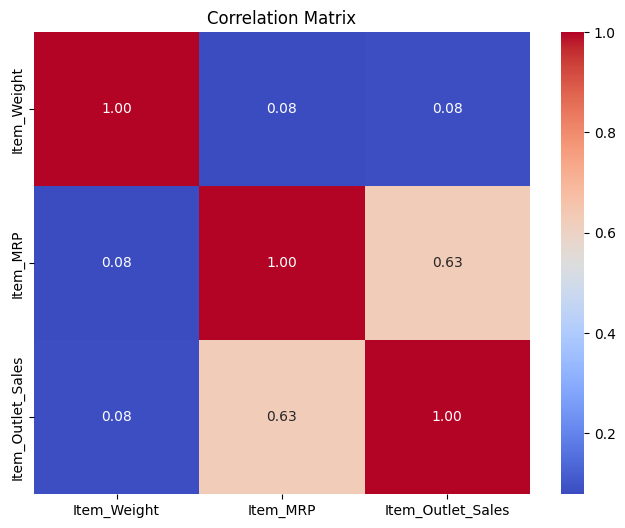

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


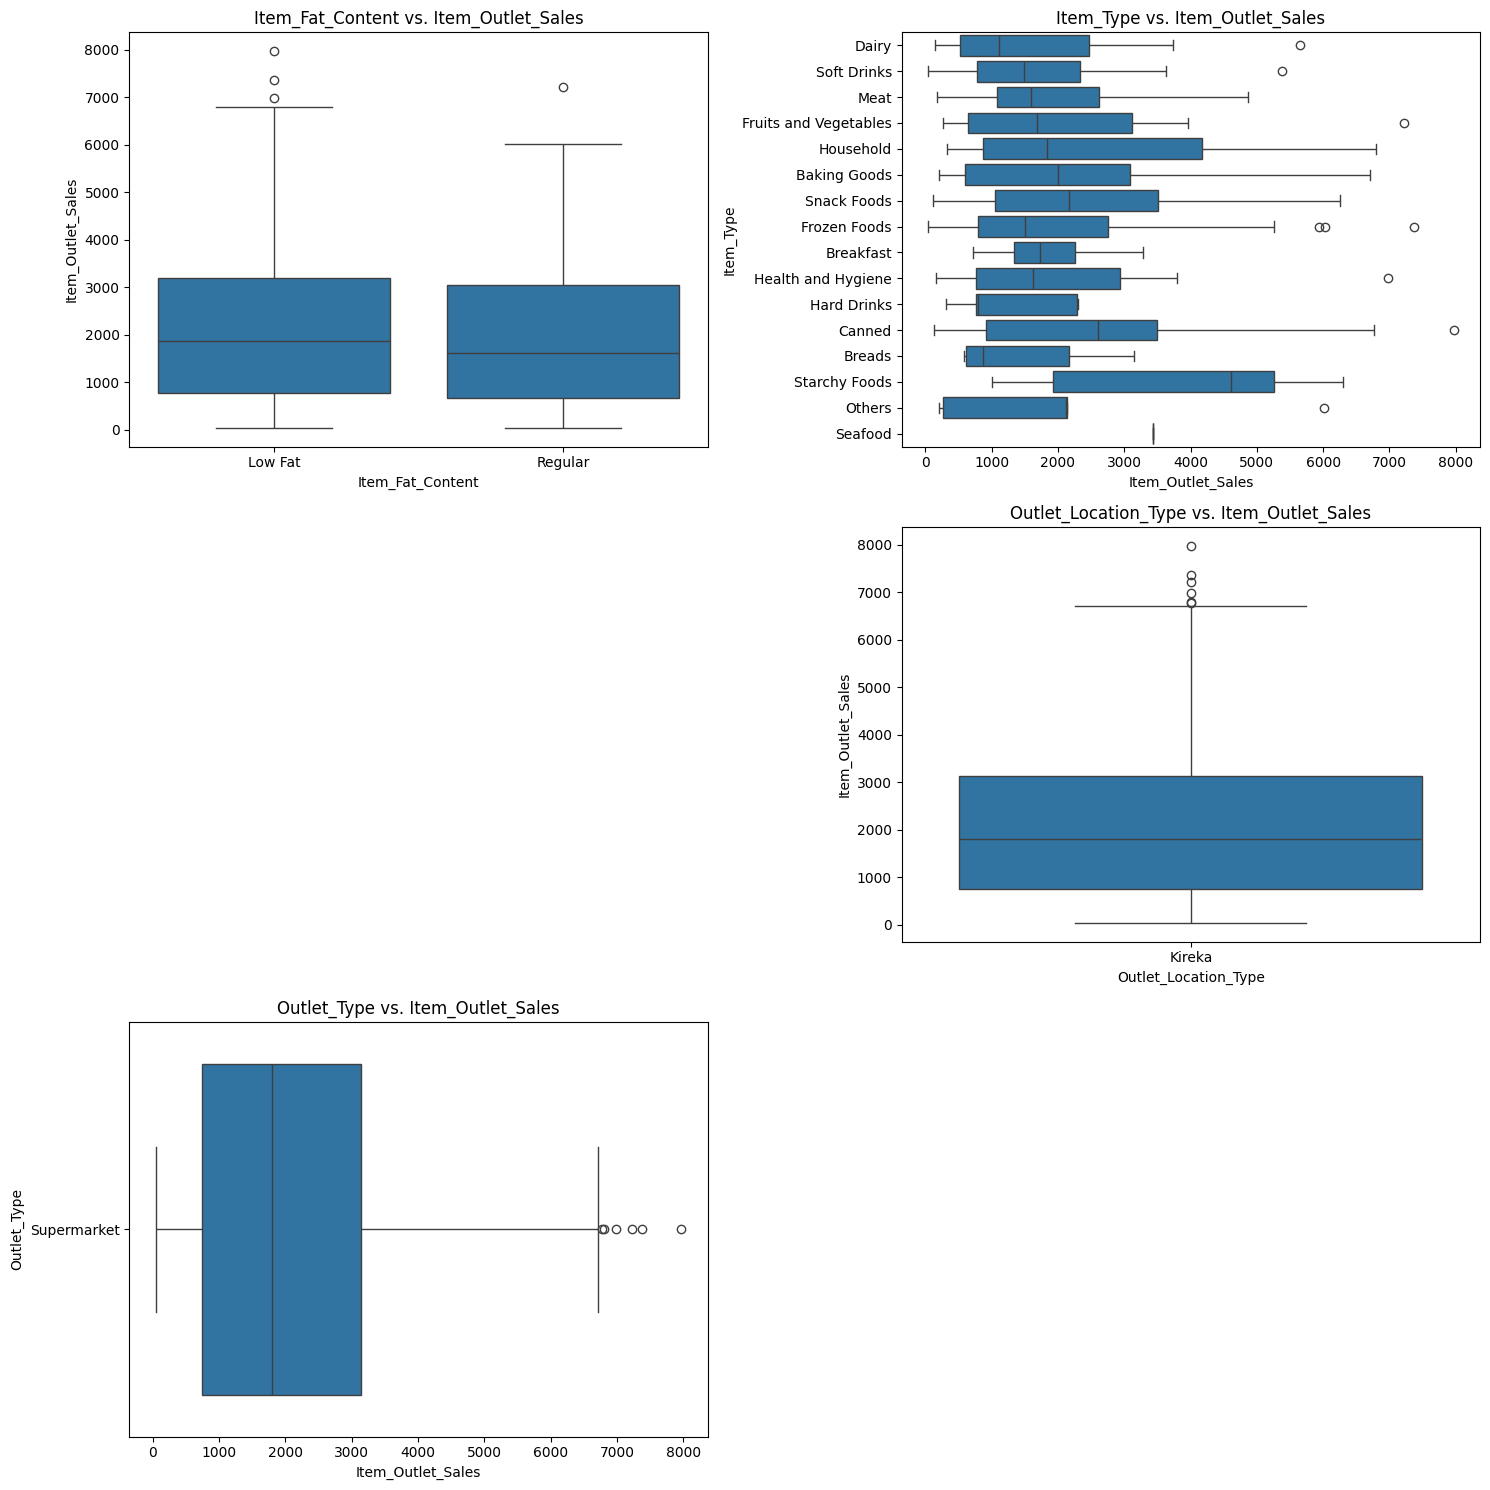

In [19]:
# Create subplots for box plots
plt.figure(figsize=(15, 15))

# Box Plot for Item_Fat_Content vs. Item_Outlet_Sales
plt.subplot(321)
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item_Fat_Content vs. Item_Outlet_Sales')

# Box Plot for Item_Type vs. Item_Outlet_Sales
plt.subplot(322)
sns.boxplot(data=df, y='Item_Type', x='Item_Outlet_Sales')
plt.title('Item_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Location_Type vs. Item_Outlet_Sales
plt.subplot(324)
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Type vs. Item_Outlet_Sales
plt.subplot(325)
sns.boxplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales')
plt.title('Outlet_Type vs. Item_Outlet_Sales')

plt.tight_layout()
plt.show()


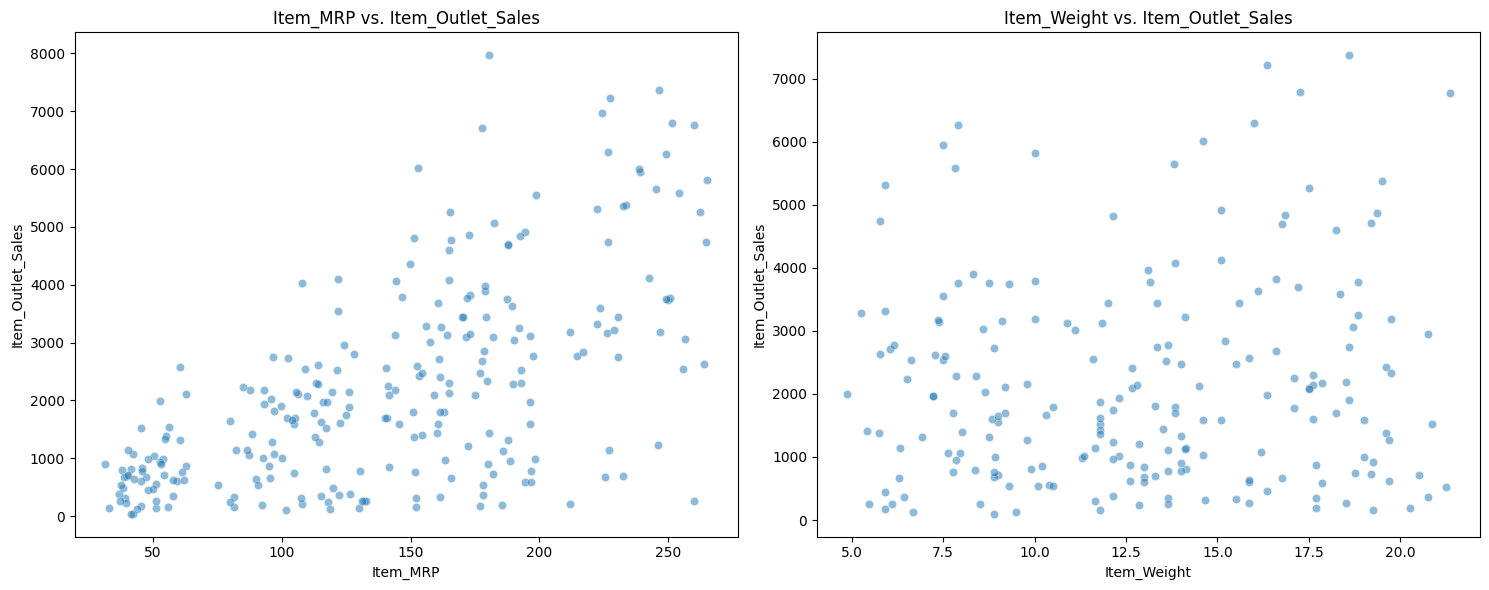

In [20]:
# Create subplots for scatter plots
plt.figure(figsize=(15, 6))

# Scatter Plot for Item_MRP vs. Item_Outlet_Sales
plt.subplot(121)
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item_MRP vs. Item_Outlet_Sales')

# Scatter Plot for Item_Weight vs. Item_Outlet_Sales
plt.subplot(122)
sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item_Weight vs. Item_Outlet_Sales')

plt.tight_layout()
plt.show()


# 5. Multivariate EDA

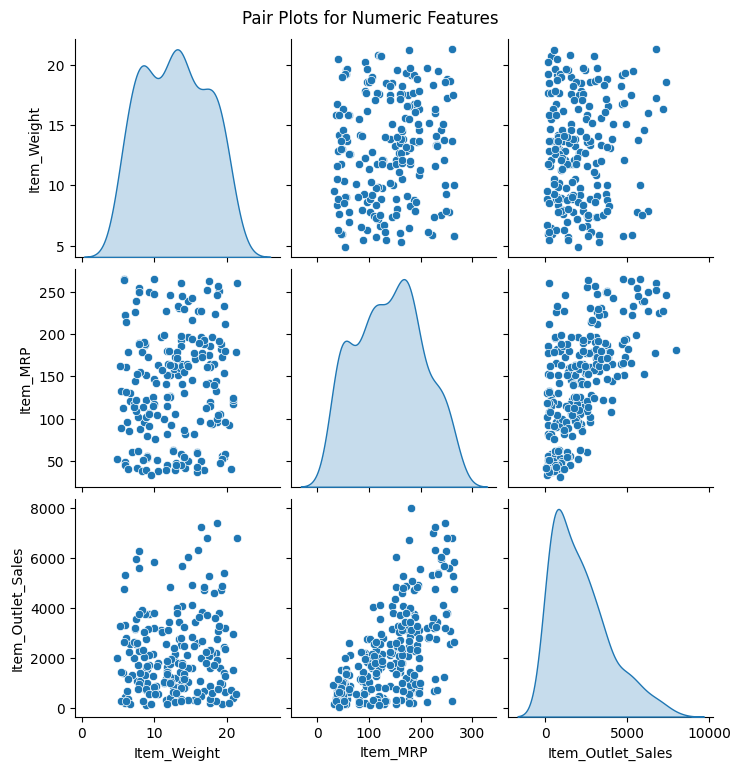

In [21]:
# Create pair plots for numeric features
sns.pairplot(df[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']], diag_kind='kde')
plt.suptitle("Pair Plots for Numeric Features", y=1.02)
plt.show()


#### Heatmap for Multicollinearity:

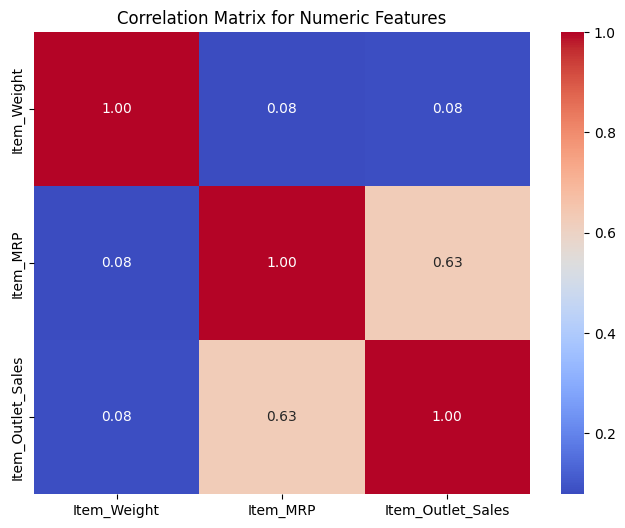

In [22]:
# Calculate the correlation matrix for all numeric features
correlation_matrix_all = df[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']].corr()

# Create a heatmap to visualize multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()


#### Interaction Effects
To investigate interaction effects between features, you can create categorical plots. Let's examine how Item_Type interacts with Outlet_Type in affecting sales:

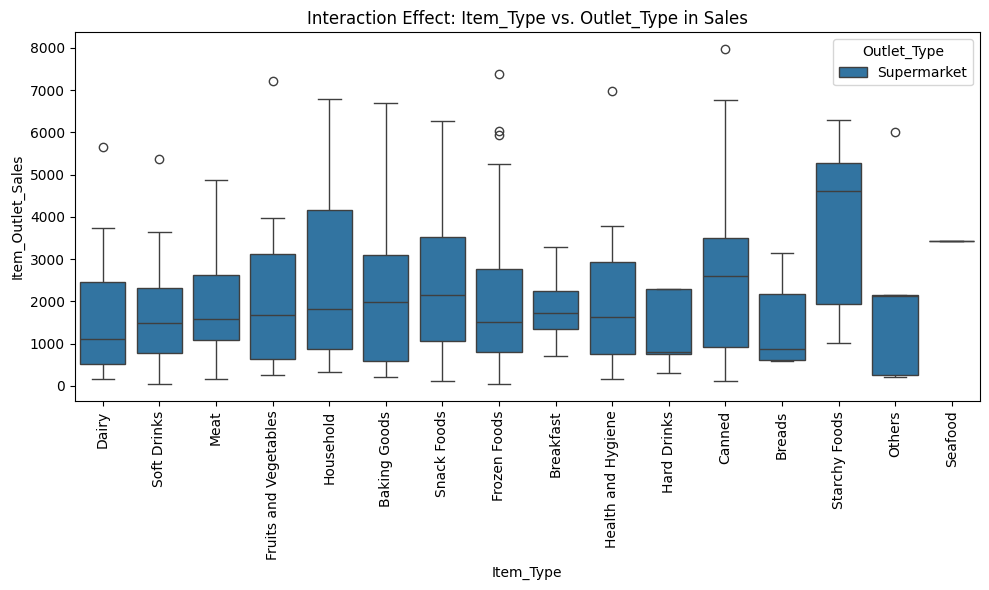

In [23]:
# Create a categorical plot (e.g., box plot) to visualize interaction effects
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Interaction Effect: Item_Type vs. Outlet_Type in Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 6. Outlier Detection Approaches
Outliers can significantly impact model performance and the accuracy of statistical analysis. Here's how you can perform outlier detection

### 1. Visual Inspection with Box Plots:

We will start by creating box plots for numeric features (Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales) to identify potential outliers.

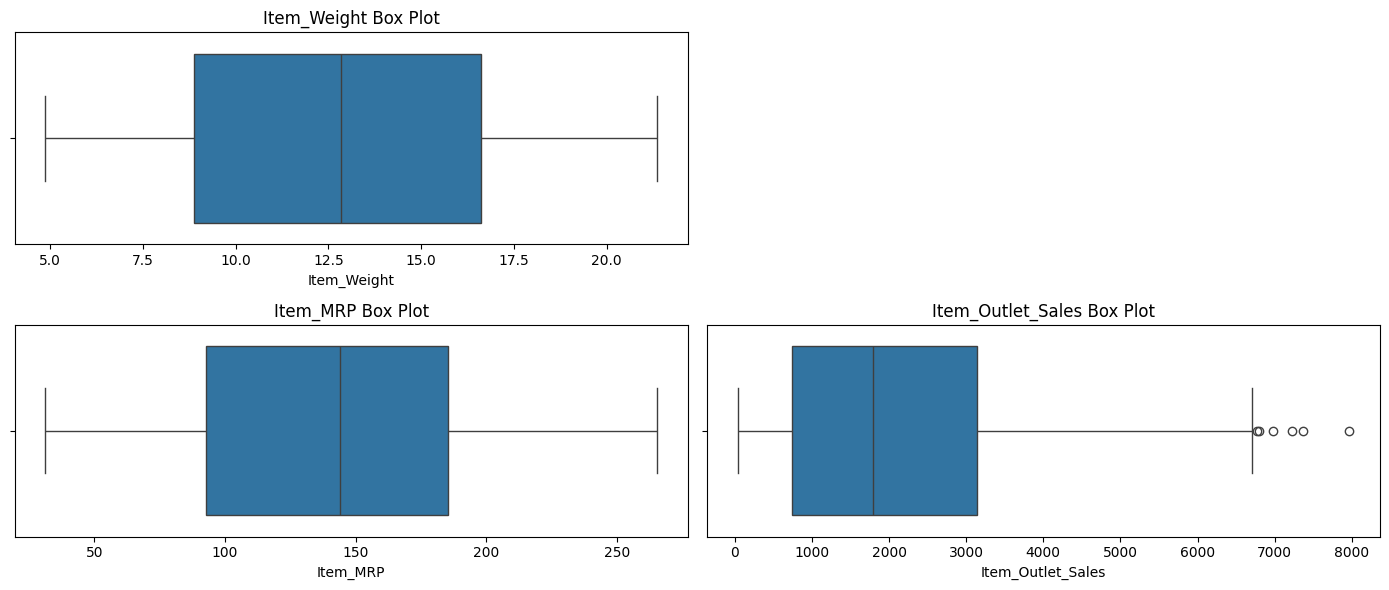

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(221)
sns.boxplot(data=df, x='Item_Weight')
plt.title('Item_Weight Box Plot')

plt.subplot(223)
sns.boxplot(data=df, x='Item_MRP')
plt.title('Item_MRP Box Plot')

plt.subplot(224)
sns.boxplot(data=df, x='Item_Outlet_Sales')
plt.title('Item_Outlet_Sales Box Plot')

plt.tight_layout()
plt.show()


### 2. Statistical Methods - IQR (Interquartile Range):
We can calculate the IQR (Interquartile Range) for each numeric feature and then determine data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as potential outliers.

In [26]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_weight = find_outliers_iqr(df, 'Item_Weight')
outliers_mrp = find_outliers_iqr(df, 'Item_MRP')
outliers_sales = find_outliers_iqr(df, 'Item_Outlet_Sales')

print("Number of outliers in Item_Weight:", len(outliers_weight))
print("Number of outliers in Item_MRP:", len(outliers_mrp))
print("Number of outliers in Item_Outlet_Sales:", len(outliers_sales))


Number of outliers in Item_Weight: 0
Number of outliers in Item_MRP: 0
Number of outliers in Item_Outlet_Sales: 6


### 3. Visualize Outliers
To visualize outliers in relation to the target variable (Item_Outlet_Sales), we can create scatter plots.

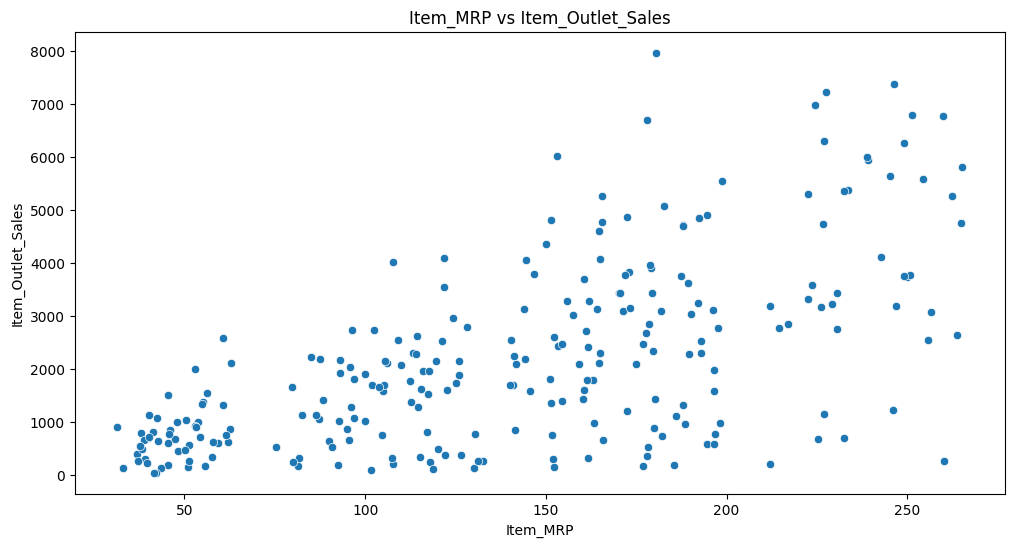

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()
